# Part I - PISA 2012 Data Analysis
## by Keith Obade

## Introduction

> This is the PISA 2012 Dataset. PISA is the Program for International Student Assessments that allows countries to compare outcomes of the learning as students get close to finishing compulsory schooling.

> This is a survey of the skills and knowledge of students as they approach the end of compulsory education which looks at majorly how prepared the students are for life beyond school. 

> It gives an assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



In [2]:
# for any warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the large dataset in chunks and choosing the columns that 
chunksize = 50000

pisa = pd.read_csv(
    'pisa2012.csv',
    encoding='latin1',
    index_col=0,
    dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str},
    iterator=True,
    chunksize=chunksize
)

# Creating the list for the rows
df_list = []

for df in pisa:
    df = df[['NC', 'AGE', 'ST01Q01', 'ST03Q01','ST03Q02','ST04Q01','ST29Q02','ST29Q05',
             'ST29Q07', 'ST29Q08', 'ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05','ST44Q07', 'ST44Q08',
             'ST87Q01','ST87Q02','ST87Q03','ST87Q04',
             'ST87Q05','ST87Q06','ST87Q07','ST87Q08','ST87Q09','ST93Q01','ST93Q03','ST93Q04',
             'ST93Q06','ST93Q07','ST94Q05','ST94Q06','ST94Q09','ST94Q10','ST94Q14',
             'BELONG','FAILMAT','INSTMOT','PERSEV','ANCBELONG',
             'ANCINSTMOT','ANCINTMAT' ,'PV1MATH','PV2MATH','PV3MATH', 'PV4MATH',
             'PV5MATH', 'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ', 'PV1SCIE'
             ,'PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]
    
    df_list.append(df)
    
df_pisa = pd.concat(df_list)
df_pisa.sample(10)

,NC,AGE,ST01Q01,ST03Q01,ST03Q02,ST04Q01,ST29Q02,ST29Q05,ST29Q07,ST29Q08,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
398540,Qatar,15.33,10,12,1996,Female,Agree,Agree,Agree,Disagree,...,410.0268,383.0203,380.6374,452.1253,345.6877,267.1951,324.0768,350.1865,294.2372,274.6550
384210,Portugal,15.83,10,7,1996,Male,NaN,NaN,NaN,NaN,...,354.3613,486.6822,420.1208,395.2605,303.8387,437.1876,515.5166,457.7023,443.7150,331.8165
436227,Slovak Republic,15.92,10,5,1996,Male,NaN,NaN,NaN,NaN,...,433.0321,411.3796,485.9605,485.1585,454.6846,510.1082,480.2686,507.3107,506.3782,488.6609
96463,Switzerland,15.75,9,7,1996,Female,NaN,NaN,NaN,NaN,...,481.3559,426.5485,520.2771,445.6119,532.1917,478.9631,428.6087,435.1361,404.3640,467.7732
101436,Switzerland,15.83,9,7,1996,Female,Agree,Agree,Strongly agree,Agree,...,590.9707,634.6577,520.2771,608.4455,541.7234,557.2921,641.2160,524.6550,623.4987,551.6971
3471,Albania,16.25,10,1,1996,Female,Agree,Agree,Agree,Agree,...,544.2652,540.2937,514.8758,526.7904,437.8277,453.5994,496.4938,486.2365,406.9750,459.1943
152503,Spain,16.08,10,4,1996,Male,Strongly agree,Strongly agree,Strongly agree,Strongly agree,...,616.9181,592.0578,618.5220,600.8792,568.8014,667.4189,636.6468,679.5412,640.3767,682.3387
6812,United Arab Emirates,15.50,10,11,1996,Male,NaN,NaN,NaN,NaN,...,382.5095,364.8667,324.7695,357.6492,273.4450,434.2969,399.7949,367.1578,406.3223,298.1537
391519,Qatar,16.08,10,3,1996,Female,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,...,373.7269,422.1798,411.0594,442.0375,358.6350,338.2507,366.2253,363.4278,323.3308,369.9552
347818,Mexico,15.67,10,7,1996,Male,Disagree,Agree,Agree,Agree,...,531.3506,512.9058,499.2727,546.5875,467.9969,486.1432,533.7001,515.0504,485.2107,504.7930


In [4]:
# Getting the data overall information
print(df_pisa.shape)
df_pisa.info()

(485490, 57)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 57 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NC          485490 non-null  object 
 1   AGE         485374 non-null  float64
 2   ST01Q01     485490 non-null  int64  
 3   ST03Q01     485490 non-null  int64  
 4   ST03Q02     485490 non-null  int64  
 5   ST04Q01     485490 non-null  object 
 6   ST29Q02     315473 non-null  object 
 7   ST29Q05     315231 non-null  object 
 8   ST29Q07     315066 non-null  object 
 9   ST29Q08     315232 non-null  object 
 10  ST44Q01     314119 non-null  object 
 11  ST44Q03     313405 non-null  object 
 12  ST44Q04     312645 non-null  object 
 13  ST44Q05     312996 non-null  object 
 14  ST44Q07     312970 non-null  object 
 15  ST44Q08     313374 non-null  object 
 16  ST87Q01     311776 non-null  object 
 17  ST87Q02     312138 non-null  object 
 18  ST87Q03     310821 non-null  ob

In [5]:
#Copy the dataframe
df_pisa2 = df_pisa.copy()

In [6]:
#Getting the country names list
df_pisa2['NC'].unique()

array(['Albania', 'United Arab Emirates ', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria ', 'Brazil ', 'Canada ',
       'Switzerland', 'Chile', 'Colombia ', 'Costa Rica ',
       'Czech Republic ', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France ', 'United Kingdom (excl.Scotland) ',
       'United Kingdom (Scotland)', 'Greece ', 'Hong Kong-China',
       'Croatia', 'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel ',
       'Italy', 'Jordan ', 'Japan', 'Kazakhstan ', 'Republic of Korea',
       'Liechtenstein', 'Lithuania', 'Luxembourg ', 'Latvia ',
       'Macao-China', 'Mexico ', 'Montenegro ', 'Malaysia ',
       'Netherlands', 'Norway ', 'New Zealand', 'Peru ', 'Poland ',
       'Portugal ', 'Qatar', 'China (Shanghai) ',
       'Perm (Russian Federation)', 'United States of America ',
       'Romania', 'Russian Federation ', 'Singapore', 'Serbia ',
       'Slovak Republic', 'Slovenia ', 'Sweden ', 'Chinese Taipei ',
       'Thailand ', 'T

Some countries have been categorized wrongly, change the following:
- Hong Kong-China - China
- Macao-China - China
- China (Shanghai) - China
- Perm (Russian Federation) - Russia 
- Russian Federation - Russia
- Chinese Taipei - Taiwan
- Viet Nam - Vietnam
- Slovak Republic - Slovakia

In [7]:
# Change the country names
df_pisa2['NC'][df_pisa2['NC']=='Hong Kong-China'] = 'China'
df_pisa2['NC'][df_pisa2['NC']=='Macao-China'] = 'China'
df_pisa2['NC'][df_pisa2['NC']=='China (Shanghai) '] = 'China'
df_pisa2['NC'][df_pisa2['NC']=='Perm (Russian Federation)'] = 'Russia'
df_pisa2['NC'][df_pisa2['NC']=='Russian Federation '] = 'Russia'
df_pisa2['NC'][df_pisa2['NC']=='Chinese Taipei '] = 'Taiwan'
df_pisa2['NC'][df_pisa2['NC']=='Viet Nam '] = 'Vietnam'
df_pisa2['NC'][df_pisa2['NC']=='Slovak Republic'] = 'Slovakia'


In [8]:
#Renaming the primary columns
df_pisa2 = df_pisa2.rename(columns={'NC':'Country', 'ST04Q01':'Gender', 'AGE':'Age'});
df_pisa2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 57 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     485490 non-null  object 
 1   Age         485374 non-null  float64
 2   ST01Q01     485490 non-null  int64  
 3   ST03Q01     485490 non-null  int64  
 4   ST03Q02     485490 non-null  int64  
 5   Gender      485490 non-null  object 
 6   ST29Q02     315473 non-null  object 
 7   ST29Q05     315231 non-null  object 
 8   ST29Q07     315066 non-null  object 
 9   ST29Q08     315232 non-null  object 
 10  ST44Q01     314119 non-null  object 
 11  ST44Q03     313405 non-null  object 
 12  ST44Q04     312645 non-null  object 
 13  ST44Q05     312996 non-null  object 
 14  ST44Q07     312970 non-null  object 
 15  ST44Q08     313374 non-null  object 
 16  ST87Q01     311776 non-null  object 
 17  ST87Q02     312138 non-null  object 
 18  ST87Q03     310821 non-null  object 
 19  ST

Correcting the null values in the dataframe

In [9]:
# Compute the average of plausible scores determines the PISA score of a student in a particular subject

df_pisa2['Maths Score'] = (df_pisa2['PV1MATH'] + df_pisa2['PV2MATH'] + df_pisa2['PV3MATH'] + df_pisa2['PV4MATH'] + df_pisa2['PV5MATH']) / 5
df_pisa2['Reading Score'] = (df_pisa2['PV1READ'] + df_pisa2['PV2READ'] + df_pisa2['PV3READ'] + df_pisa2['PV4READ'] + df_pisa2['PV5READ']) / 5
df_pisa2['Science Score'] = (df_pisa2['PV1SCIE'] + df_pisa2['PV2SCIE'] + df_pisa2['PV3SCIE'] + df_pisa2['PV4SCIE'] + df_pisa2['PV5SCIE']) / 5

df_pisa2.drop(columns=["PV1MATH", "PV2MATH", "PV3MATH", "PV4MATH", "PV5MATH",   
            "PV1READ", "PV2READ", "PV3READ", "PV4READ", "PV5READ", 
            "PV1SCIE", "PV2SCIE", "PV3SCIE", "PV4SCIE", "PV5SCIE"], inplace=True)

In [10]:
df_pisa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 45 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        485490 non-null  object 
 1   Age            485374 non-null  float64
 2   ST01Q01        485490 non-null  int64  
 3   ST03Q01        485490 non-null  int64  
 4   ST03Q02        485490 non-null  int64  
 5   Gender         485490 non-null  object 
 6   ST29Q02        315473 non-null  object 
 7   ST29Q05        315231 non-null  object 
 8   ST29Q07        315066 non-null  object 
 9   ST29Q08        315232 non-null  object 
 10  ST44Q01        314119 non-null  object 
 11  ST44Q03        313405 non-null  object 
 12  ST44Q04        312645 non-null  object 
 13  ST44Q05        312996 non-null  object 
 14  ST44Q07        312970 non-null  object 
 15  ST44Q08        313374 non-null  object 
 16  ST87Q01        311776 non-null  object 
 17  ST87Q02        312138 non-nul

In [11]:
# Fill in the means and replace in the NaN variables

df_pisa2.loc[np.isfinite(df_pisa2['BELONG']) == False, 'BELONG'] = df_pisa2['BELONG'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['FAILMAT']) == False, 'FAILMAT'] = df_pisa2['FAILMAT'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['INSTMOT']) == False, 'INSTMOT'] = df_pisa2['INSTMOT'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['PERSEV']) == False, 'PERSEV'] = df_pisa2['PERSEV'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['ANCBELONG']) == False, 'ANCBELONG'] = df_pisa2['ANCBELONG'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['ANCINSTMOT']) == False, 'ANCINSTMOT'] = df_pisa2['ANCINSTMOT'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['ANCINTMAT']) == False, 'ANCINTMAT'] = df_pisa2['ANCINTMAT'].mean()
df_pisa2.loc[np.isfinite(df_pisa2['Age']) == False, 'Age'] = df_pisa2['Age'].mean()
df_pisa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 45 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        485490 non-null  object 
 1   Age            485490 non-null  float64
 2   ST01Q01        485490 non-null  int64  
 3   ST03Q01        485490 non-null  int64  
 4   ST03Q02        485490 non-null  int64  
 5   Gender         485490 non-null  object 
 6   ST29Q02        315473 non-null  object 
 7   ST29Q05        315231 non-null  object 
 8   ST29Q07        315066 non-null  object 
 9   ST29Q08        315232 non-null  object 
 10  ST44Q01        314119 non-null  object 
 11  ST44Q03        313405 non-null  object 
 12  ST44Q04        312645 non-null  object 
 13  ST44Q05        312996 non-null  object 
 14  ST44Q07        312970 non-null  object 
 15  ST44Q08        313374 non-null  object 
 16  ST87Q01        311776 non-null  object 
 17  ST87Q02        312138 non-nul

In [12]:
#Rename the columns
df_pisa2.rename({'ST01Q01': 'International_Grade', 'ST03Q01': 'Birth_Month','ST03Q02': 'Birth_Year','ST29Q02':'Motivation_Work',
                 'ST29Q05':'Motivation_Career_Chances',
                 'ST29Q07': 'Motivation_Future_Study', 'ST29Q08': 'Motivation_Get_Job', 'ST44Q01':'Failure_Not_Good_at_Maths_Problems', 
                 'ST44Q03':'Failure_Teacher_Did_Not_Explain_Well', 'ST44Q04':'Failure_Bad_Guesses', 'ST44Q05':'Failure_Material_Too_Hard',
                 'ST44Q07':'Failure_Teacher_Didnt_Get_Students_Interested', 'ST44Q08': 'Failure_Unlucky',
                 'ST87Q01':'Belonging_Feel_Like_Outsider','ST87Q02':'Belonging_Make_Friends_Easily','ST87Q03': 'Belonging_Belong_at_School',
                 'ST87Q04': 'Belonging_Feel_Awkward_at_School','ST87Q05':'Belonging_Liked_by_Other_Students','ST87Q06':'Belonging_Feel_Lonely_at_School',
                 'ST87Q07':'Belonging_Feel_Happy_at_School','ST87Q08':'Belonging_Things_Are_Ideal_at_School',
                 'ST87Q09':'Belonging_Satisfied_at_School','ST93Q01':'Perseverance_Give_up_easily','ST93Q03':'Perseverance_Put_off_difficult_problems',
                 'ST93Q04':'Perseverance_Remain_interested','ST93Q06':'Perseverance_Continue_to_perfection','ST93Q07':'Perseverance_Exceed_expectations',
                 'ST94Q05':'OPS_Can_Handle_a_Lot_of_Information','ST94Q06':'OPS_Quick_to_Understand','ST94Q09':'OPS_Seek_Explanations','ST94Q10':'OPS_Can_Link_Facts',
                 'ST94Q14':'OPS_Like_to_Solve_Complex_Problems','BELONG':'Sense_of_Belonging_Score','FAILMAT':'Attributions_to_Failure_in_Mathematics_Score',
                 'INSTMOT':'Motivation_for_Mathematics','PERSEV':'Perseverance','ANCBELONG':'Sense_of_Belonging_to_School(Anchored)',
                 'ANCINSTMOT':'Motivation_for_Mathematics(Anchored)','ANCINTMAT':'Mathematics_Interest(Anchored)'}, axis="columns",inplace=True)

In [13]:
#Copying the dataset
df_pisa3 = df_pisa2.copy()

In [14]:
df_pisa3.drop(columns=["OPS_Can_Handle_a_Lot_of_Information", "OPS_Quick_to_Understand", "OPS_Seek_Explanations", 
                       "OPS_Can_Link_Facts", "OPS_Like_to_Solve_Complex_Problems"], inplace=True)
df_pisa3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 40 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Country                                        485490 non-null  object 
 1   Age                                            485490 non-null  float64
 2   International_Grade                            485490 non-null  int64  
 3   Birth_Month                                    485490 non-null  int64  
 4   Birth_Year                                     485490 non-null  int64  
 5   Gender                                         485490 non-null  object 
 6   Motivation_Work                                315473 non-null  object 
 7   Motivation_Career_Chances                      315231 non-null  object 
 8   Motivation_Future_Study                        315066 non-null  object 
 9   Motivation_Get_Job                   

In [15]:
#Looking at the  unique values
df_pisa3['Motivation_Work'].unique()

array(['Strongly agree', nan, 'Disagree', 'Agree', 'Strongly disagree'],
      dtype=object)

In [16]:
# Changing the Likert Scale into categories
motivatation_ratings = ['Strongly disagree', 'Disagree', 'Agree','Strongly agree']
mrtings = pd.api.types.CategoricalDtype(ordered = True, categories = motivatation_ratings)
m_vars = ['Motivation_Work', 'Motivation_Career_Chances', 'Motivation_Future_Study','Motivation_Get_Job']

for i in range(len(m_vars)):
    df_pisa3[m_vars[i]] = df_pisa3[m_vars[i]].astype(mrtings)

In [17]:
#Looking at the  unique values
df_pisa3['Motivation_Work'].unique()

['Strongly agree', NaN, 'Disagree', 'Agree', 'Strongly disagree']
Categories (4, object): ['Strongly disagree' < 'Disagree' < 'Agree' < 'Strongly agree']

In [18]:
#Looking at the  unique values
df_pisa3['Failure_Not_Good_at_Maths_Problems'].unique()

array(['Likely', nan, 'Very   Likely', 'Slightly likely',
       'Not at all likely'], dtype=object)

In [19]:
# Changing the Likert Scale into categories
failure_ratings = ['Not at all likely', 'Slightly likely','Likely', 'Very   Likely']
frtings = pd.api.types.CategoricalDtype(ordered = True, categories = failure_ratings)
f_vars = ['Failure_Not_Good_at_Maths_Problems', 'Failure_Teacher_Did_Not_Explain_Well', 'Failure_Bad_Guesses',
          'Failure_Material_Too_Hard', 'Failure_Teacher_Didnt_Get_Students_Interested', 'Failure_Unlucky']

for i in range(len(f_vars)):
    df_pisa3[f_vars[i]] = df_pisa3[f_vars[i]].astype(frtings)

In [20]:
#Looking at the  unique values
df_pisa3['Failure_Not_Good_at_Maths_Problems'].unique()

['Likely', NaN, 'Very   Likely', 'Slightly likely', 'Not at all likely']
Categories (4, object): ['Not at all likely' < 'Slightly likely' < 'Likely' < 'Very   Likely']

In [21]:
#Looking at the  unique values
df_pisa3['Belonging_Feel_Like_Outsider'].unique()

array(['Agree', nan, 'Strongly disagree', 'Disagree', 'Strongly agree'],
      dtype=object)

In [22]:
# Changing the Likert Scale into categories
bel_ratings = ['Strongly disagree', 'Disagree','Agree', 'Strongly agree']
brtings = pd.api.types.CategoricalDtype(ordered = True, categories = bel_ratings)
b_vars = ['Belonging_Feel_Like_Outsider', 'Belonging_Make_Friends_Easily', 'Belonging_Belong_at_School',
          'Belonging_Feel_Awkward_at_School', 'Belonging_Liked_by_Other_Students', 
          'Belonging_Feel_Lonely_at_School', 'Belonging_Feel_Happy_at_School',
         'Belonging_Things_Are_Ideal_at_School', 'Belonging_Satisfied_at_School']

for i in range(len(b_vars)):
    df_pisa3[b_vars[i]] = df_pisa3[b_vars[i]].astype(brtings)

In [23]:
#Looking at the  unique values
df_pisa3['Belonging_Feel_Like_Outsider'].unique()

['Agree', NaN, 'Strongly disagree', 'Disagree', 'Strongly agree']
Categories (4, object): ['Strongly disagree' < 'Disagree' < 'Agree' < 'Strongly agree']

In [24]:
#Looking at the  unique values
df_pisa3['Perseverance_Continue_to_perfection'].unique()

array(['Somewhat like me', 'Very much like me', nan, 'Mostly like me',
       'Not much like me', 'Not at all like me'], dtype=object)

In [25]:
# Changing the Likert Scale into categories
per_ratings = ['Not at all like me', 'Not much like me', 'Somewhat like me', 'Mostly like me', 'Very much like me']
prtings = pd.api.types.CategoricalDtype(ordered = True, categories = per_ratings)
p_vars = ['Perseverance_Give_up_easily', 'Perseverance_Put_off_difficult_problems', 'Perseverance_Remain_interested',
          'Perseverance_Continue_to_perfection', 'Perseverance_Exceed_expectations']

for i in range(len(p_vars)):
    df_pisa3[p_vars[i]] = df_pisa3[p_vars[i]].astype(prtings)

In [26]:
#Looking at the  unique values
df_pisa3['Perseverance_Continue_to_perfection'].unique()

['Somewhat like me', 'Very much like me', NaN, 'Mostly like me', 'Not much like me', 'Not at all like me']
Categories (5, object): ['Not at all like me' < 'Not much like me' < 'Somewhat like me' < 'Mostly like me' < 'Very much like me']

In [27]:
df_pisa3.describe()

,Age,International_Grade,Birth_Month,Birth_Year,Sense_of_Belonging_Score,Attributions_to_Failure_in_Mathematics_Score,Motivation_for_Mathematics,Perseverance,Sense_of_Belonging_to_School(Anchored),Motivation_for_Mathematics(Anchored),Mathematics_Interest(Anchored),Maths Score,Reading Score,Science Score
count,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,15.784283,9.813323,6.558512,1996.070061,-0.022259,-0.013110,0.108456,0.140125,-0.082717,0.021863,0.078194,469.651234,472.006964,475.808094
std,0.290186,3.734726,3.705244,0.255250,0.790195,0.828162,0.793902,0.799956,0.800087,0.562711,0.570391,100.786610,98.863310,97.998470
min,15.170000,7.000000,1.000000,1996.000000,-3.690000,-3.766600,-2.300000,-4.053000,-3.373100,-2.217200,-1.695800,54.767080,6.445400,25.158540
25%,15.580000,9.000000,4.000000,1996.000000,-0.370000,-0.301700,0.050000,-0.147500,-0.148900,0.021863,0.078194,396.019620,405.044200,405.762800
50%,15.750000,10.000000,7.000000,1996.000000,-0.022259,-0.013110,0.108456,0.140125,-0.082717,0.021863,0.078194,465.734520,475.477980,475.512860
75%,16.000000,10.000000,9.000000,1996.000000,0.080000,0.152400,0.500000,0.258600,0.199200,0.021863,0.078194,540.123060,542.831195,546.381920
max,16.330000,96.000000,99.000000,1997.000000,2.630000,3.906700,1.590000,3.528600,3.255400,2.530800,2.998400,903.107960,849.359740,857.832900


In [28]:
# Replace the values of Birth Month = 99 to null

df_pisa3['Birth_Month'] = df_pisa3['Birth_Month'].replace(99, np.nan)

# Check that the Birth Month values changed

df_pisa3['Birth_Month'].unique()

array([ 2.,  9.,  8., 10.,  3.,  6.,  5.,  4.,  7.,  1., 12., 11., nan])

In [29]:
#Remove columns not needed

df_pisa3.drop(columns=["Sense_of_Belonging_to_School(Anchored)", "Motivation_for_Mathematics(Anchored)",
                       "Mathematics_Interest(Anchored)", "International_Grade" ], inplace=True)

In [30]:
df_pisa3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 36 columns):
 #   Column                                         Non-Null Count   Dtype   
---  ------                                         --------------   -----   
 0   Country                                        485490 non-null  object  
 1   Age                                            485490 non-null  float64 
 2   Birth_Month                                    485374 non-null  float64 
 3   Birth_Year                                     485490 non-null  int64   
 4   Gender                                         485490 non-null  object  
 5   Motivation_Work                                315473 non-null  category
 6   Motivation_Career_Chances                      315231 non-null  category
 7   Motivation_Future_Study                        315066 non-null  category
 8   Motivation_Get_Job                             315232 non-null  category
 9   Failure_Not_Good_at_Maths_

In [31]:
#Change the categories of country and gender
for c in ["Country", "Gender"]:
    df_pisa3[c] = df_pisa3[c].astype(str)


In [32]:
df_pisa4 = df_pisa3.copy()

### What is the structure of your dataset?

> The original dataset consisted of 485,490 rows and 635 columns. Since there are too many rows and columns, I chose the columns of interest and stored them in a new dataframe, consisting of the same number of rows and only 36 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is to discover which factors affect the students' total scores in Maths, Reading and Science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Many variables will be examined to find which variable(s) affects the students' scores the most. These variables include birth year and month, gender, motivation, sense of belonging, age and perseverance, etc.



## Univariate Exploration.


**Question** : What is the difference between the gender.

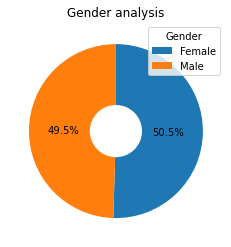

In [33]:
# Plot 1: Donut chart of the gender

plt.pie(df_pisa4['Gender'].value_counts(), startangle = 90, counterclock = False, autopct = '%1.1f%%', 
        wedgeprops = {'width' : 0.7});

# Set the plot's title and legend
plt.title("Gender analysis")
plt.legend(['Female', 'Male'], title = 'Gender');

From the plot above, we see that the female students are slightly more than the male students.

**Question**:What is the distribution of the birth years

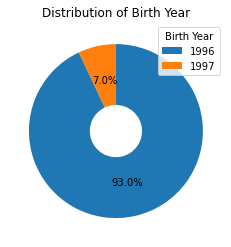

In [34]:
# Plot 2: Donut chart of the birth year

plt.pie(df_pisa4['Birth_Year'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', 
        wedgeprops = {'width' : 0.7});

# Set the plot's title and legend
plt.title("Distribution of Birth Year")
plt.legend(['1996', '1997'], title = 'Birth Year');

From the plot 2, we can see that a lot of the students are born in 1996 with 93% and 7% born in 1997.

**Question**: What is the distribution of the Instrumental motivation ratings by the students.

In [35]:
# Unify the color by storing it into base_color
base_color = sb.color_palette()[0]

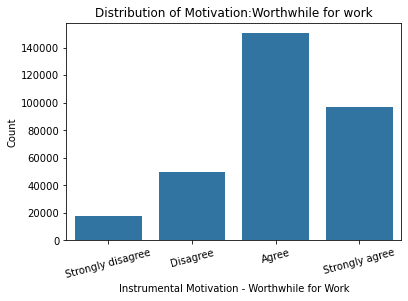

In [36]:
# Plot 3: Bar chart of the Motivation: Worthwhile for Work

sb.countplot(data = df_pisa4, x = 'Motivation_Work', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Worthwhile for work")
plt.xlabel("Instrumental Motivation - Worthwhile for Work")
plt.ylabel('Count');

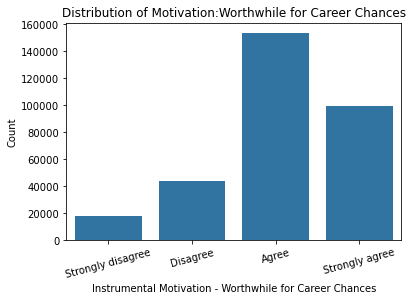

In [37]:
# Plot 4: Bar chart of the Motivation: Worthwhile for Career Chances

sb.countplot(data = df_pisa4, x = 'Motivation_Career_Chances', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Worthwhile for Career Chances")
plt.xlabel("Instrumental Motivation - Worthwhile for Career Chances")
plt.ylabel('Count');

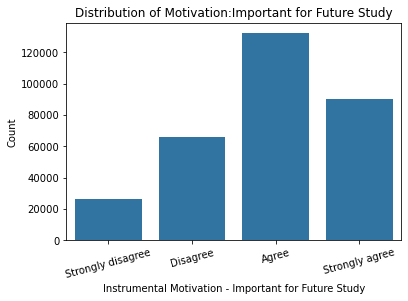

In [38]:
# Plot 5: Bar chart of the Motivation: Important for Future Study

sb.countplot(data = df_pisa4, x = 'Motivation_Future_Study', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Important for Future Study")
plt.xlabel("Instrumental Motivation - Important for Future Study")
plt.ylabel('Count');

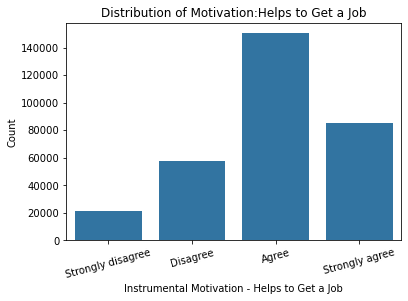

In [39]:
# Plot 6: Bar chart of the Motivation: Important for Future Study

sb.countplot(data = df_pisa4, x = 'Motivation_Get_Job', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Motivation:Helps to Get a Job")
plt.xlabel("Instrumental Motivation - Helps to Get a Job")
plt.ylabel('Count');

As seen in Plot 5,6 and 7, there is a shape for all the plots is almost similar with most students chose the Agree choice then Strongly Agree, Disagree and lastly Strongly disagree. 
This shows that most students agree that the is motivation to studying.


**Question**: What is the distribution of the sense of belonging by the students.

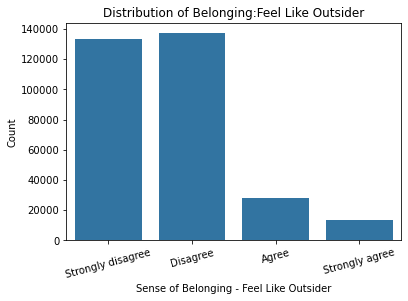

In [40]:
# Plot 7: Bar chart of the Sense of Belonging - Feel Like Outsider

sb.countplot(data = df_pisa4, x = 'Belonging_Feel_Like_Outsider', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Feel Like Outsider")
plt.xlabel("Sense of Belonging - Feel Like Outsider")
plt.ylabel('Count');

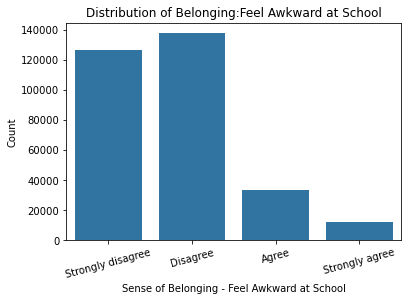

In [41]:
# Plot 8: Sense of Belonging - Feel Awkward at School

sb.countplot(data = df_pisa4, x = 'Belonging_Feel_Awkward_at_School', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Feel Awkward at School")
plt.xlabel("Sense of Belonging - Feel Awkward at School")
plt.ylabel('Count');

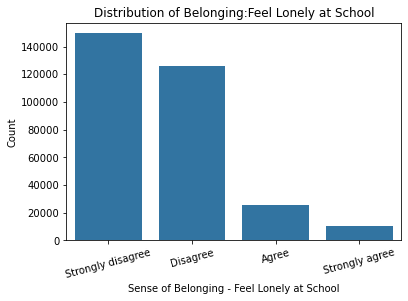

In [42]:
# Plot 9: Sense of Belonging - Feel Lonely at School

sb.countplot(data = df_pisa4, x = 'Belonging_Feel_Lonely_at_School', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Feel Lonely at School")
plt.xlabel("Sense of Belonging - Feel Lonely at School")
plt.ylabel('Count');

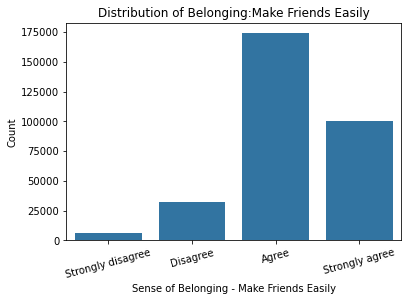

In [43]:
# Plot 10: Bar chart of the Sense of Belonging - Make Friends Easily

sb.countplot(data = df_pisa4, x = 'Belonging_Make_Friends_Easily', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Make Friends Easily")
plt.xlabel("Sense of Belonging - Make Friends Easily")
plt.ylabel('Count');

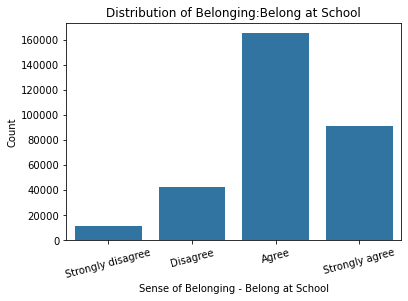

In [44]:
# Plot 11: Bar chart of the Sense of Belonging - Belong at School

sb.countplot(data = df_pisa4, x = 'Belonging_Belong_at_School', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Belong at School")
plt.xlabel("Sense of Belonging - Belong at School")
plt.ylabel('Count');

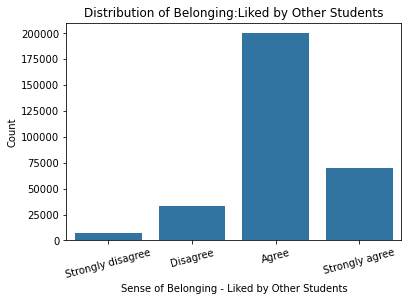

In [45]:
# Plot 12: Sense of Belonging - Liked by Other Students

sb.countplot(data = df_pisa4, x = 'Belonging_Liked_by_Other_Students', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Liked by Other Students")
plt.xlabel("Sense of Belonging - Liked by Other Students")
plt.ylabel('Count');

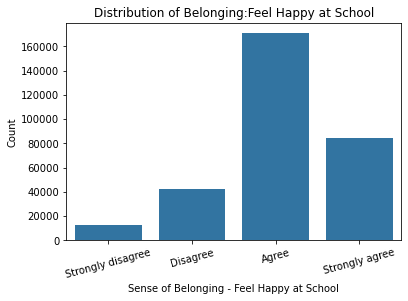

In [46]:
# Plot 13: Sense of Belonging - Feel Happy at School

sb.countplot(data = df_pisa4, x = 'Belonging_Feel_Happy_at_School', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Feel Happy at School")
plt.xlabel("Sense of Belonging - Feel Happy at School")
plt.ylabel('Count');

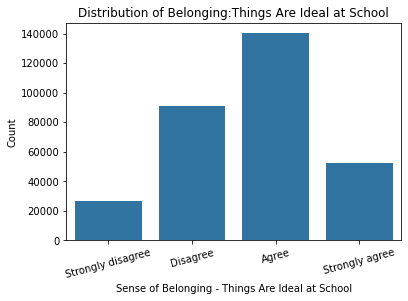

In [47]:
# Plot 14: Sense of Belonging - Things Are Ideal at School

sb.countplot(data = df_pisa4, x = 'Belonging_Things_Are_Ideal_at_School', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Things Are Ideal at School")
plt.xlabel("Sense of Belonging - Things Are Ideal at School")
plt.ylabel('Count');

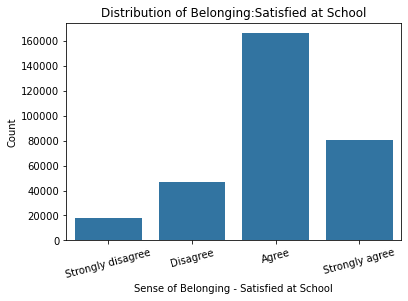

In [48]:
# Plot 15: Sense of Belonging - Satisfied at School

sb.countplot(data = df_pisa4, x = 'Belonging_Satisfied_at_School', color=base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Belonging:Satisfied at School")
plt.xlabel("Sense of Belonging - Satisfied at School")
plt.ylabel('Count');

From the plots 7-15, there are several patterns that are shown on them regarding how the students viewed their sense of belonging:

- Plots 7, 8, 9 show negative views on sense of belonging(Feel Like Outsider,Feel Awkward at School,Feel Lonely at School) and how the students rate them and its evident that disagree with those concepts which shows that most of the students do not get these 3 senses a lot.

- Plots 8-15, show positive views on the students sense of belonging(Make Friends Easily, Belong at School, Liked by Other Students, Feel Happy at School,Things Are Ideal at School, Satisfied at School) and most students agree that these are factors that measure their sense of belonging at school.

**Question**: Which country had the highest number of students?

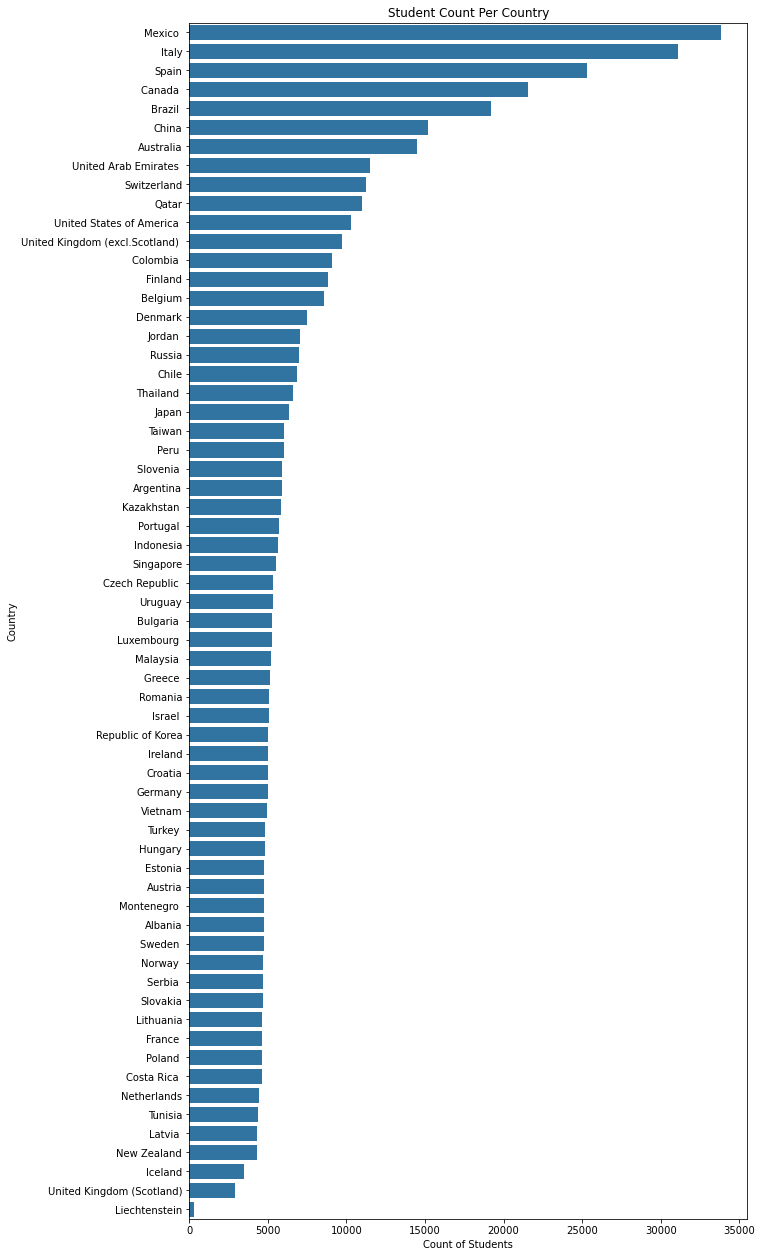

In [49]:
# Plot 16: Bar chart of the countries

# Get the descending order of the Country column
gen_order = df_pisa4['Country'].value_counts().index

# Change the size of the figure to show all the countries clearly
plt.figure(figsize=[10,22])
sb.countplot(data = df_pisa4, y = 'Country', order = gen_order, color=base_color)


# Set the plot's title and labels
plt.title("Student Count Per Country")
plt.ylabel("Country")
plt.xlabel('Count of Students');

As per the plot above, we can observe that Mexico has the highest student count who participated with around 34000 students and Lischtestein with less than 1000 students.

**Question**:What is are the distributions of the different student scores 

In [50]:
#Adding a column for the Total Score
df_pisa4['Total Score'] = df_pisa4['Maths Score'] + df_pisa4['Reading Score'] + df_pisa4['Science Score']


In [51]:
# Getting the descriptive statistics of the dataframe
df_pisa4.describe()

,Age,Birth_Month,Birth_Year,Sense_of_Belonging_Score,Attributions_to_Failure_in_Mathematics_Score,Motivation_for_Mathematics,Perseverance,Maths Score,Reading Score,Science Score,Total Score
count,485490.000000,485374.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,15.784283,6.536419,1996.070061,-0.022259,-0.013110,0.108456,0.140125,469.651234,472.006964,475.808094,1417.466292
std,0.290186,3.418968,0.255250,0.790195,0.828162,0.793902,0.799956,100.786610,98.863310,97.998470,288.108813
min,15.170000,1.000000,1996.000000,-3.690000,-3.766600,-2.300000,-4.053000,54.767080,6.445400,25.158540,231.343780
25%,15.580000,4.000000,1996.000000,-0.370000,-0.301700,0.050000,-0.147500,396.019620,405.044200,405.762800,1211.977785
50%,15.750000,7.000000,1996.000000,-0.022259,-0.013110,0.108456,0.140125,465.734520,475.477980,475.512860,1416.139380
75%,16.000000,9.000000,1996.000000,0.080000,0.152400,0.500000,0.258600,540.123060,542.831195,546.381920,1624.367100
max,16.330000,12.000000,1997.000000,2.630000,3.906700,1.590000,3.528600,903.107960,849.359740,857.832900,2479.776080


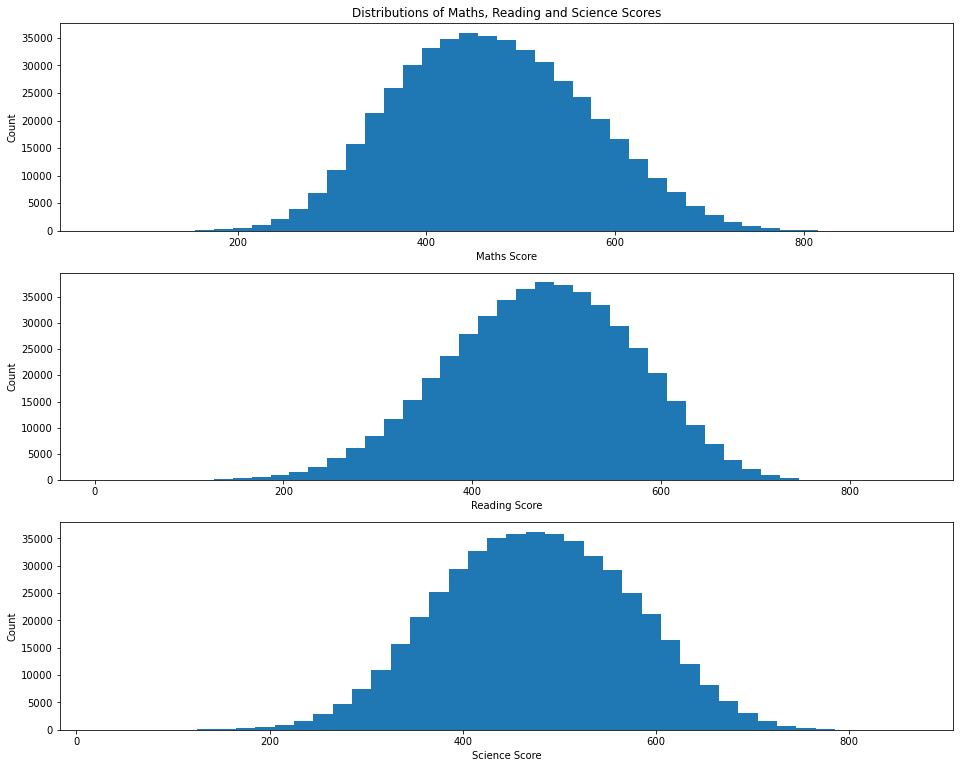

In [52]:
#Plot 17:Histogram Plots for the different scores(Maths, Reading and Science Scores)

fig, ax = plt.subplots(nrows=3, figsize = [16,13])

variables = ['Maths Score', 'Reading Score', 'Science Score']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_pisa4[var]), max(df_pisa4[var])+20, 20)
    ax[i].hist(data = df_pisa4, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format('Count'))
    ax[0].set_title("Distributions of Maths, Reading and Science Scores")

plt.show()

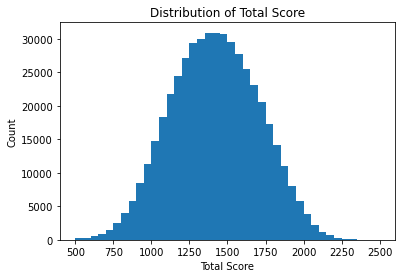

In [53]:
# Plot 18: Histogram of the total scores

# Set the bins size
bins = np.arange(500, df_pisa4['Total Score'].max()+50, 50);

plt.hist(data = df_pisa4, x = 'Total Score', bins = bins);

# Set the plot's title and labels
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel('Count');

Plots 17 and 18 show the Reading, Maths, Science and Total scores are unimodal and are all uniform distributions.

The distributions also show that the Maths Scores have a slightly lower mean than the rest which shows there is a bit of a struggle on Maths.

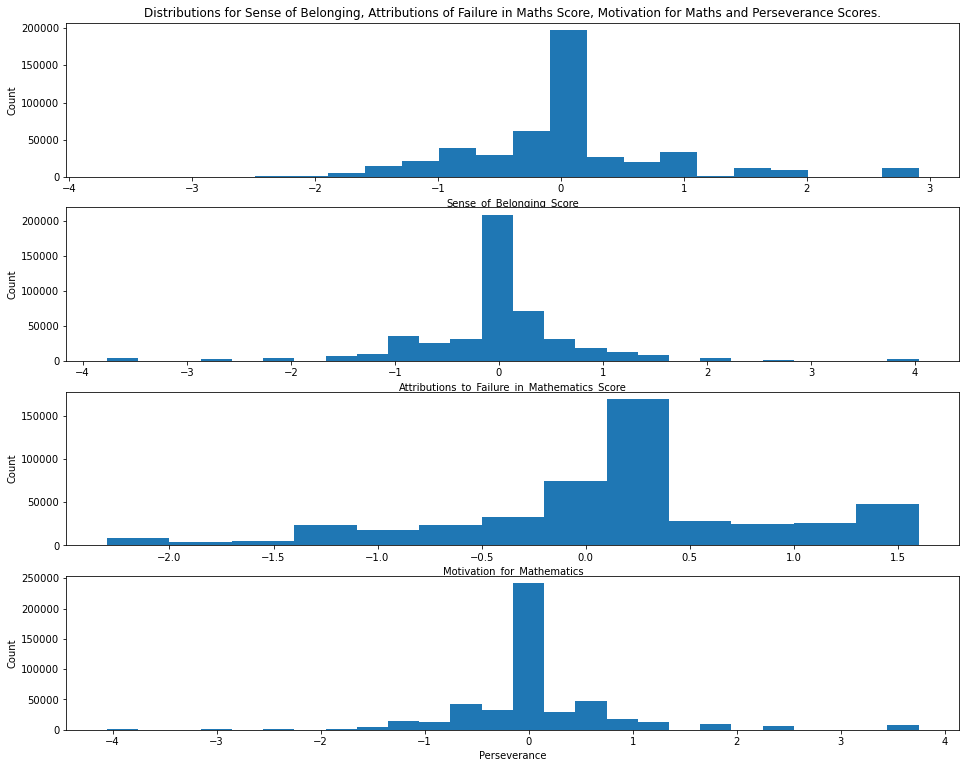

In [54]:
#Plot 19:Histogram Plots for the different scores( -Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance Scores)

fig, ax = plt.subplots(nrows=4, figsize = [16,13])

variables = ['Sense_of_Belonging_Score', 'Attributions_to_Failure_in_Mathematics_Score', 'Motivation_for_Mathematics', 'Perseverance']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_pisa4[var]), max(df_pisa4[var])+0.30, 0.30)
    ax[i].hist(data = df_pisa4, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format('Count'))
    ax[0].set_title("Distributions for Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance Scores.")

plt.show()

The plot above shows the histograms of the Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance Scores which are mostly left skewed with most of the scores being around 0.

**Question**: What is the most popular age in the dataset

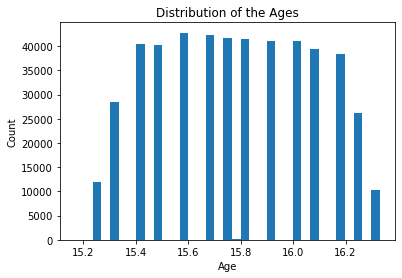

In [55]:
# Plot 17: age histogram
plt.hist(data = df_pisa4, x = "Age", bins=35)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of the Ages");

 The vast majority of students are between 15 and 16 years old. In the range between 15.4 and 16.1, the distribution is a uniform one.The most popular age is around 15.5 as per the plot shown above.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Age, Reading, Maths and Science scores all have a normal distribution while the Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance Scores are more left skewed. Some unusual points wa that one of the months was 99 which is not possible since there are only 12 months in a year. There were no transformations since the points  did not have huge values and the data was fairly clean apart from adding the Total Score column.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the month 99, I replaced it to be a null value since we do not need to guess the birth month for the students. I also categorized the likert scale data so that there are levels to them and to be able to find insights on them.

## Bivariate Exploration.



**Question**: How are the qualitative variables correlated to each other which are the test scores vs the scores on Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance?

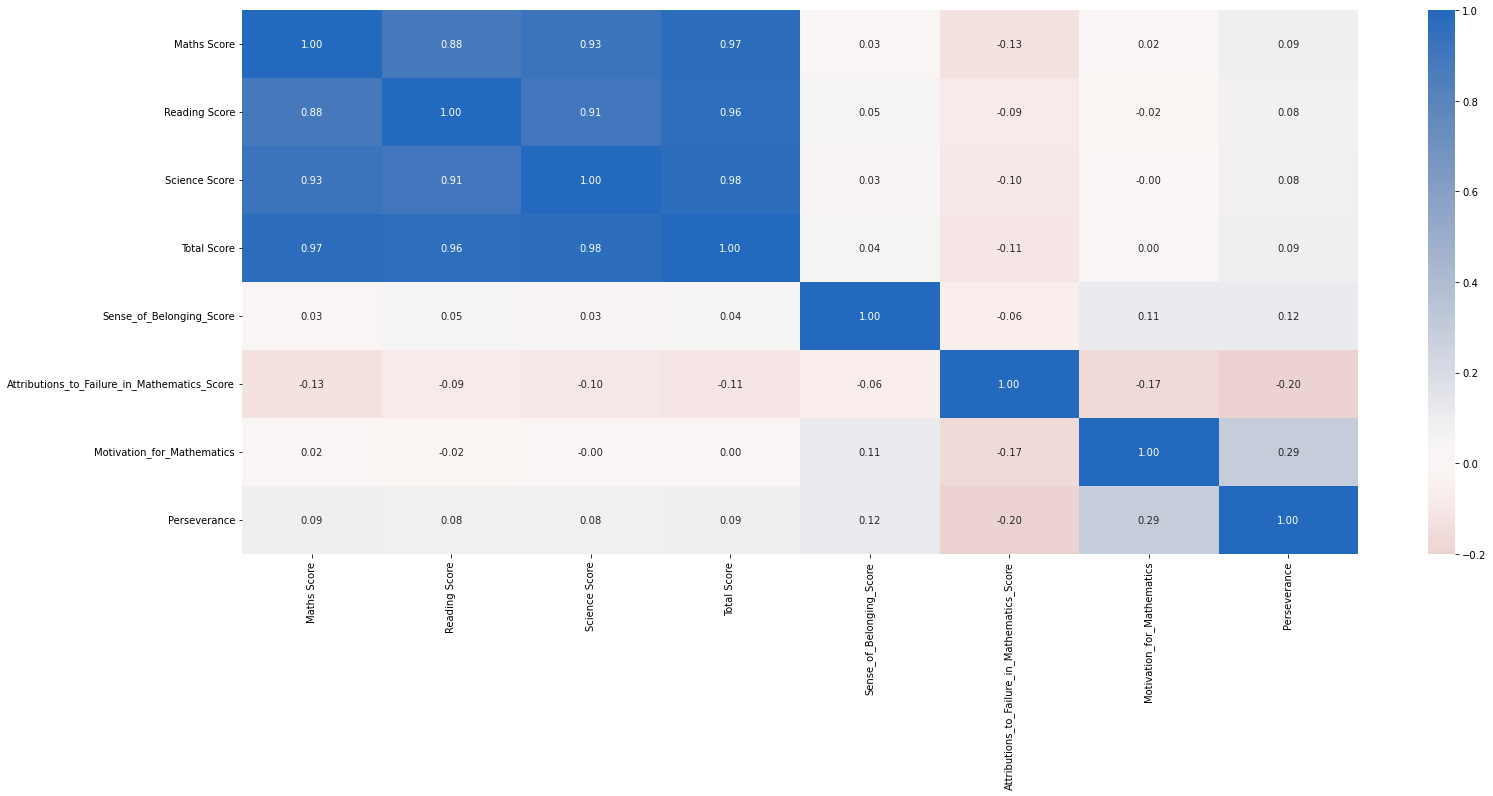

In [56]:
# Plot 1: Correlation matrix of numeric variables concerning test scores and the other different scores.
numeric_vars = ["Maths Score", "Reading Score", "Science Score", "Total Score", 
                "Sense_of_Belonging_Score", "Attributions_to_Failure_in_Mathematics_Score", 
                "Motivation_for_Mathematics", "Perseverance"]
plt.figure(figsize = [25, 10])
sb.heatmap(df_pisa4[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()



In the correlation matrix plotted above, the focus lies on numeric variables, such as test scores and the scores on factors affecting the students. The strongest positive correlations can be observed between the scores of the different test areas math, reading, or science. 

If a student does well in one subject, it is likely that he will do well in another as well. It also shows the factors affecting the students scores(Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance scores) are only weakly correlated with test scores. There are even negatively correlated factors with students' performance in the PISA test, though the correlation is rather weak. 

This could imply a problem with the factors affecting the student do not reflect on the student scores.


<Figure size 2160x1080 with 0 Axes>

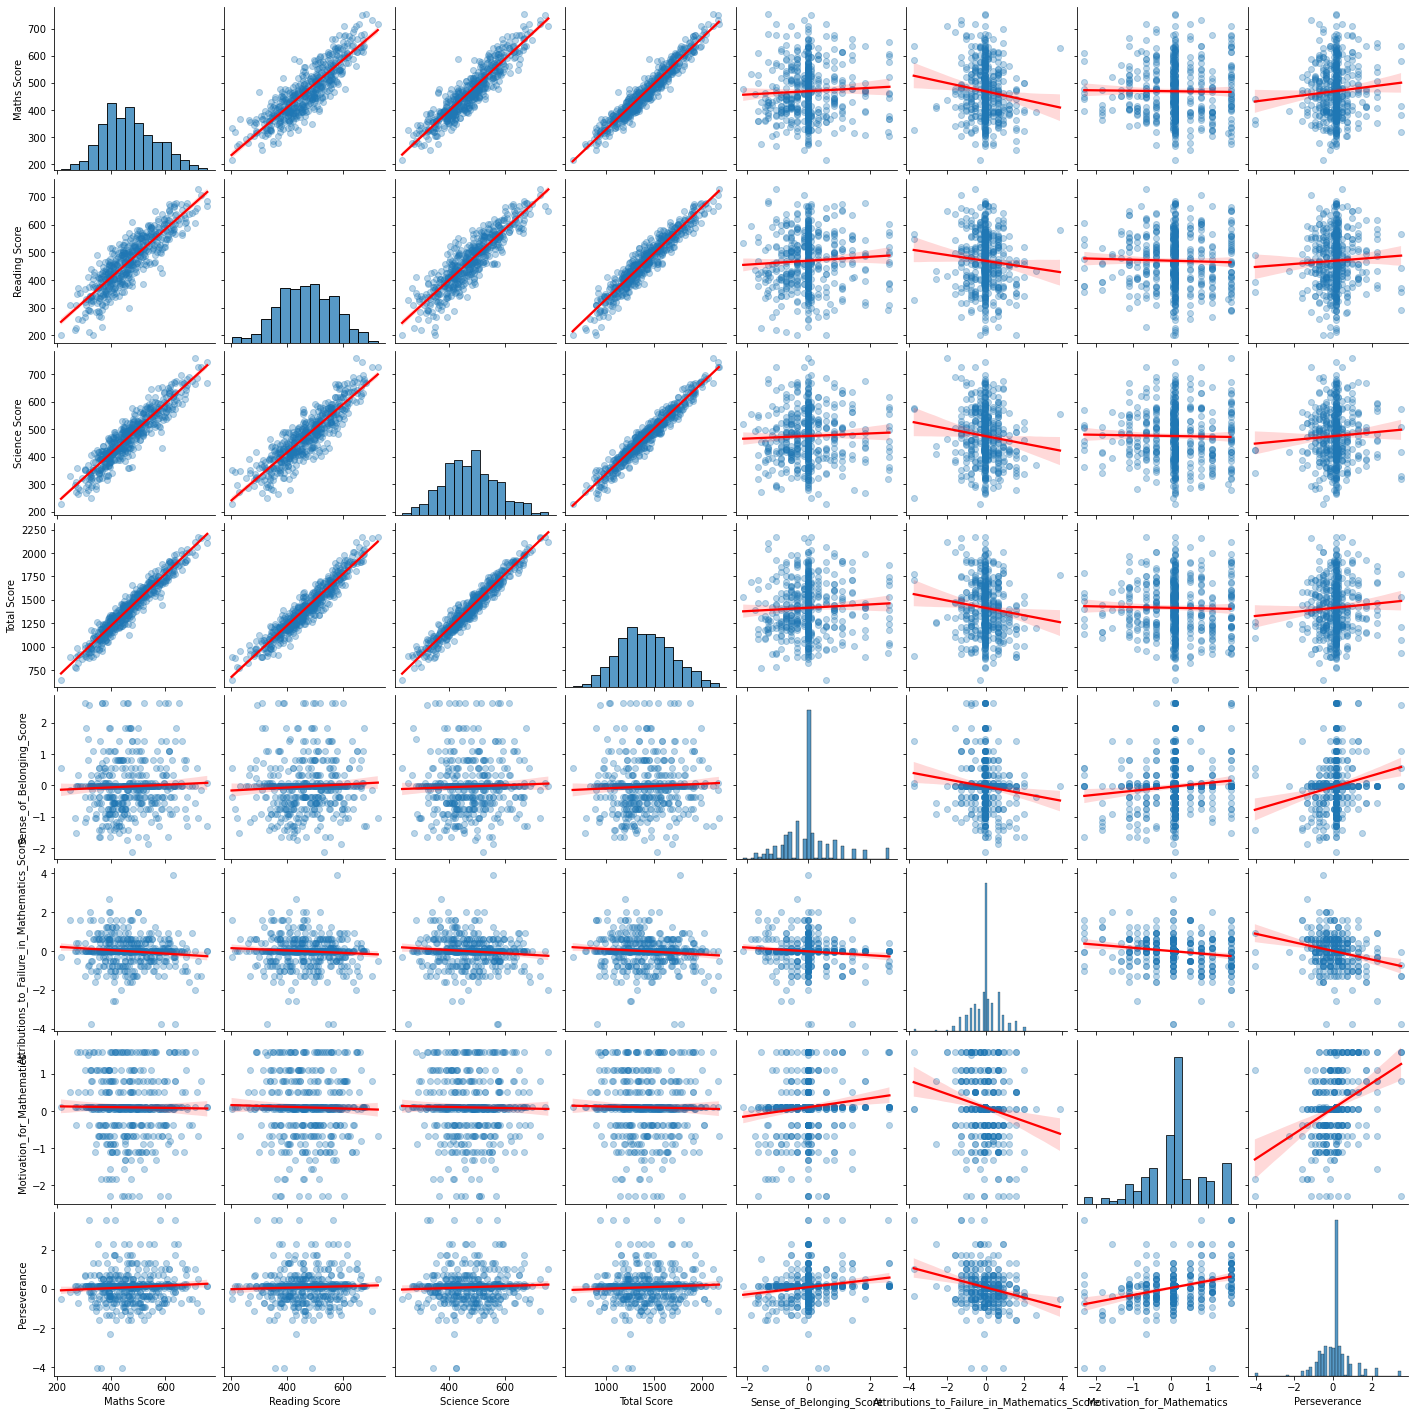

In [57]:
#Plot 2: Scatter plot matrix for numeric variables shown above
plt.figure(figsize = [30, 15])
df_pisa4_sample = df_pisa4.sample(500)
sb.pairplot(df_pisa4_sample[numeric_vars], kind="reg", plot_kws={"line_kws":{"color":"red"}, 
                                                                "scatter_kws": {"alpha": 0.3}});

This is another was another way of showing the correlation of the different scores and show that the test scores are strongly correlated while the other scores are weak to no correlation to the test scores.

**Question**: What is the difference in the total scores in the genders?

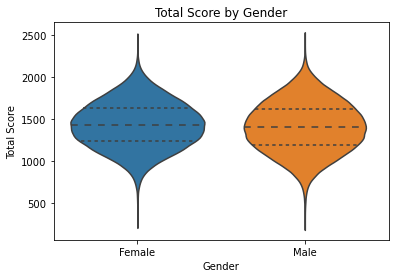

In [58]:
# Plot 3: Relationship between gender and the total score

sb.violinplot(data = df_pisa4, x = 'Gender', y = 'Total Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Gender")
plt.xlabel("Gender")
plt.ylabel('Total Score');

The plot above shows no difference in the scores of male and female, there is only a slight difference in the width where the female is slightly wider than the male one.

**Question**: What is the difference in Total scores in the different birth years?

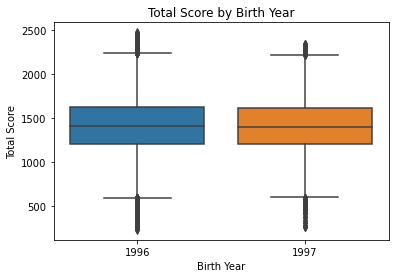

In [59]:
# Plot 4: Relationship between the birth year and the total score

sb.boxplot(data = df_pisa4, x = 'Birth_Year', y = 'Total Score');

# Set the plot's title and labels
plt.title("Total Score by Birth Year")
plt.xlabel("Birth Year")
plt.ylabel('Total Score');

The score in 1996 is slightly higher than that of 1997 but note that majority of the students were born in 1996 which might be a cause of the difference.

In [60]:
#Grouping the different scores per country
math_order = df_pisa4.groupby('Country')['Maths Score'].mean().sort_values(ascending = False).index
reading_order = df_pisa4.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
science_order = df_pisa4.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

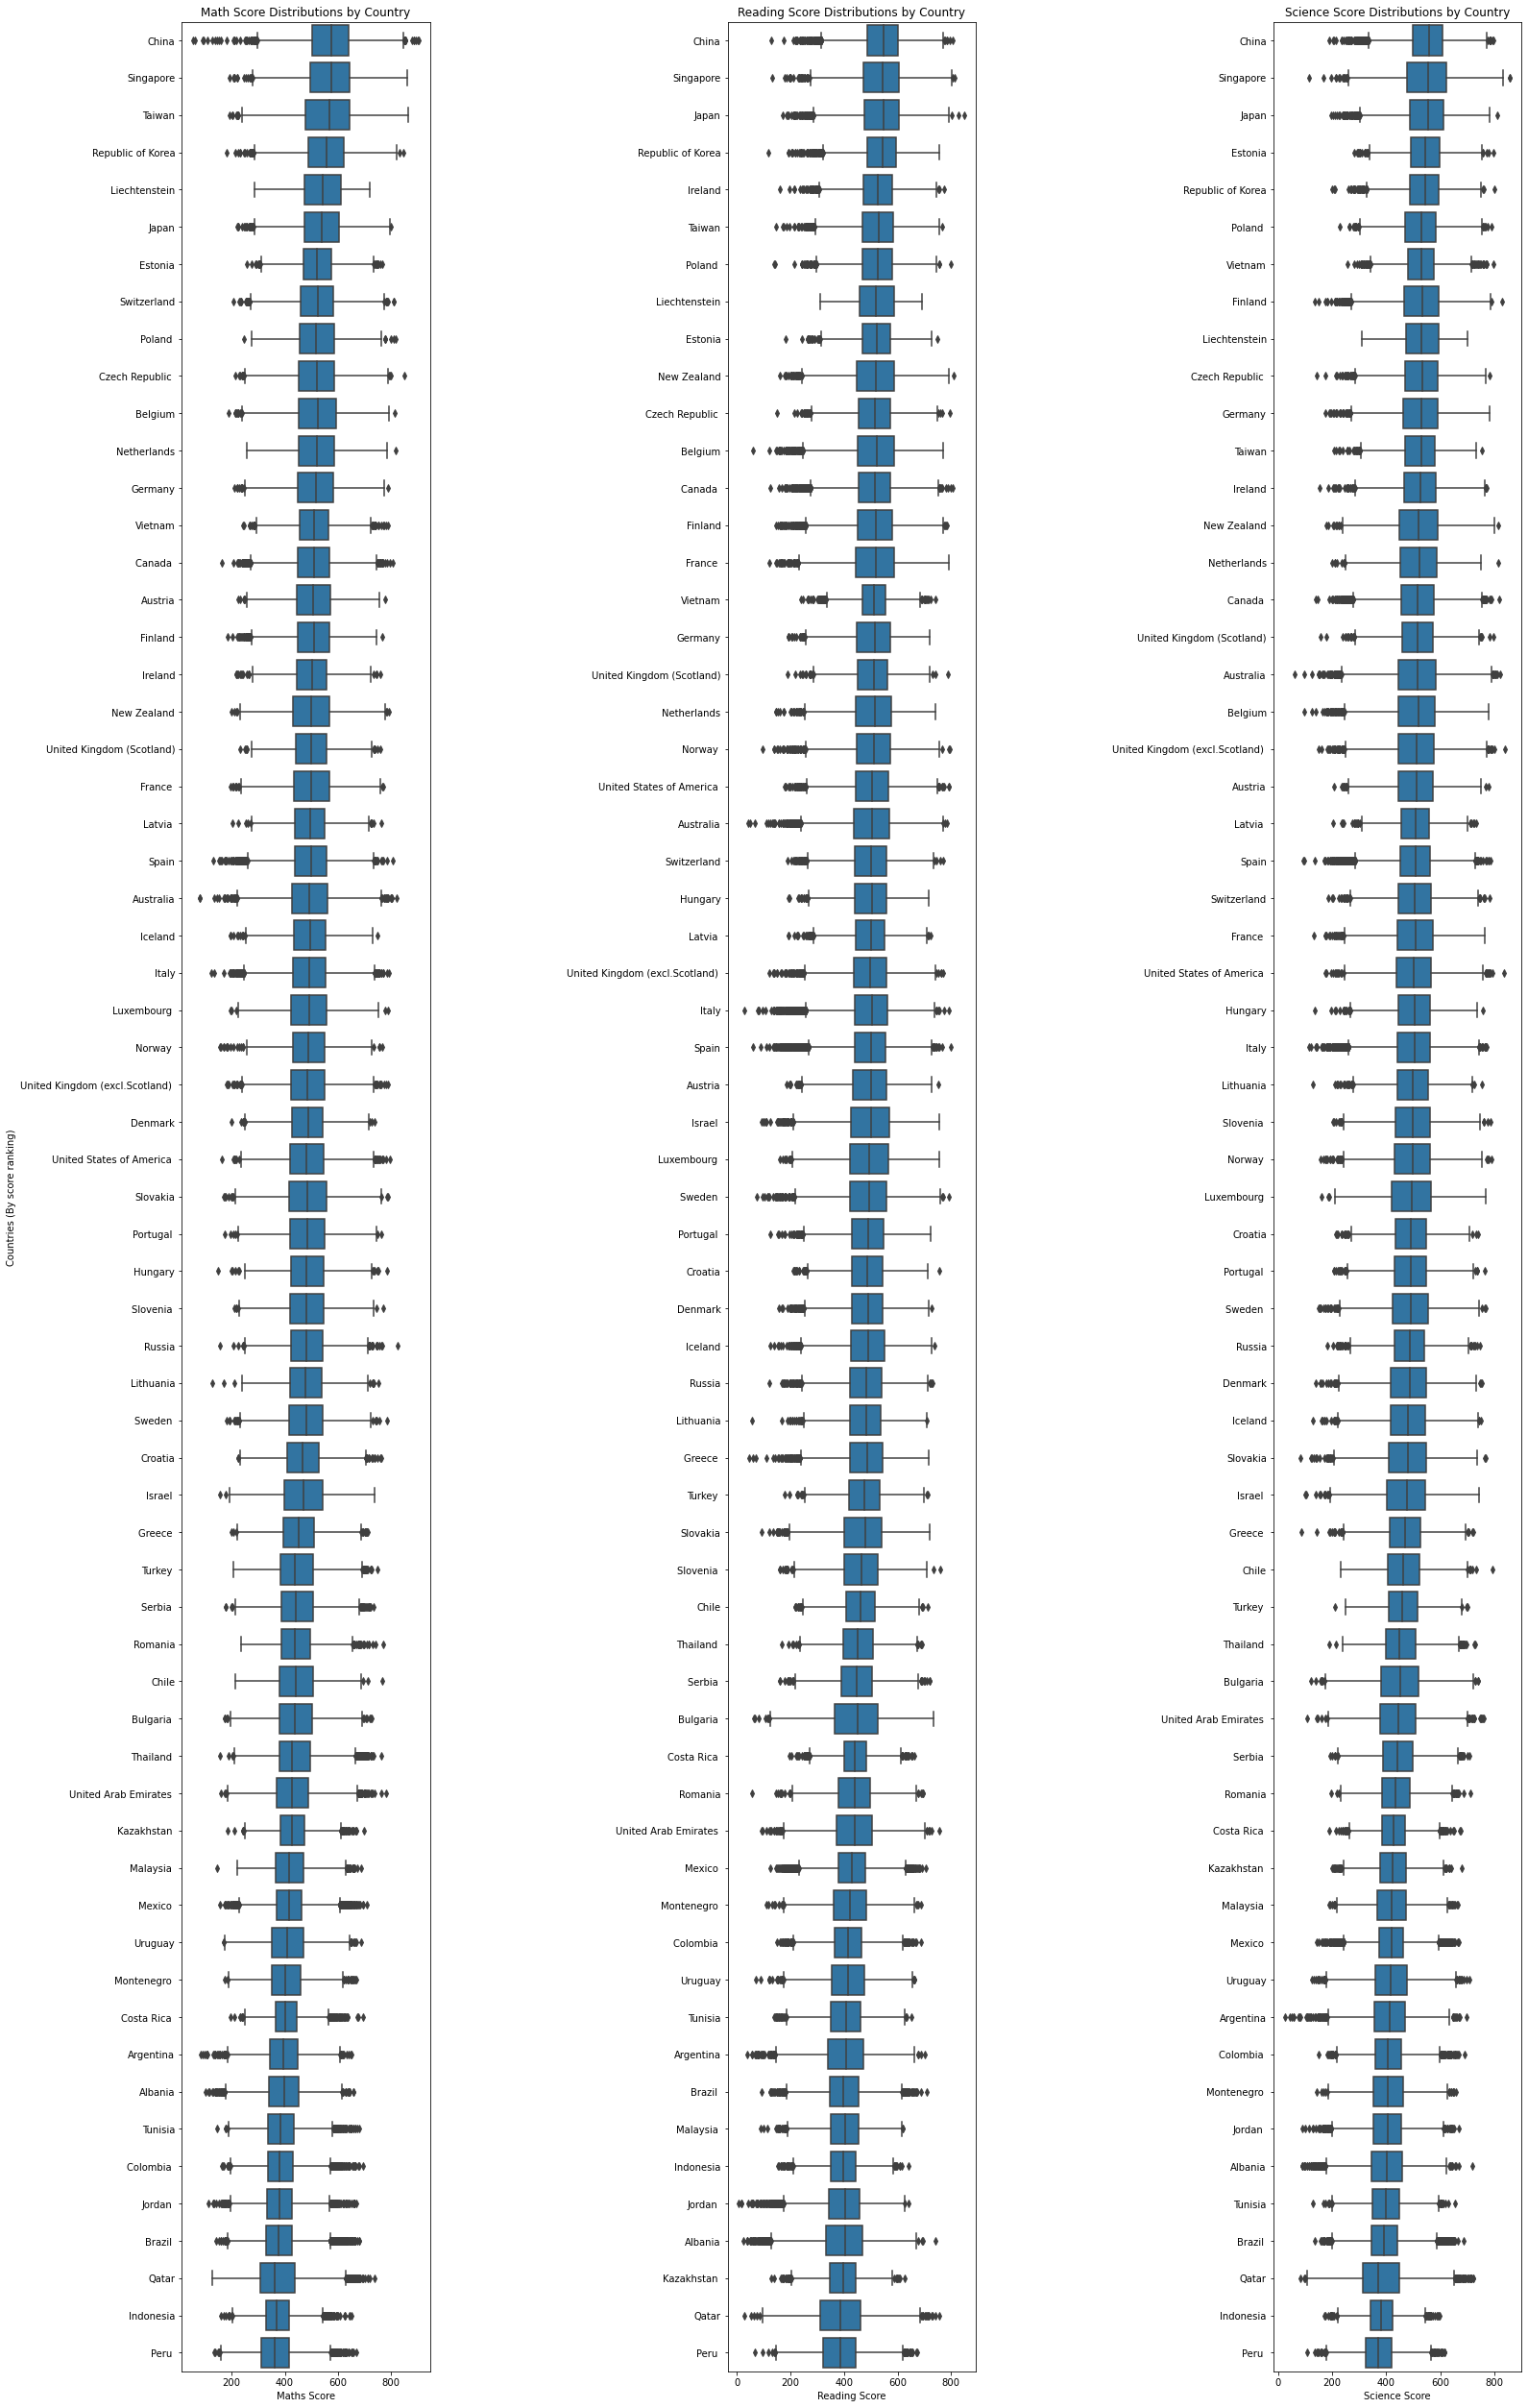

In [61]:
# Plot 5: Different subjects plots for test scores per country

plt.figure(figsize = [25, 45])
plt.subplots_adjust(wspace = 1.2) # adjust spacing between subplots

plt.subplot(1, 3, 1)
sb.boxplot(x = df_pisa4['Maths Score'], y = df_pisa4['Country'], order = math_order, color=base_color);
plt.ylabel('Countries (By score ranking)')
plt.title('Math Score Distributions by Country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df_pisa4['Reading Score'], y = df_pisa4['Country'], order = reading_order, color=base_color);
plt.ylabel(''); # Remove label
plt.title('Reading Score Distributions by Country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df_pisa4['Science Score'], y = df_pisa4['Country'], order = science_order, color=base_color);
plt.ylabel(''); # Remove label
plt.title('Science Score Distributions by Country');

From the plot above, we can see the how most students performed in the different subjects with the plots being based on the means of the test scores.

We can see that they are aranges in decreasing order and show that most of the counties had students performing between 400-500 points in their scores with some outliers.

We can also observe that China had the students that performed the best and Peru being the least in all subjects which is point that can be researched on more.

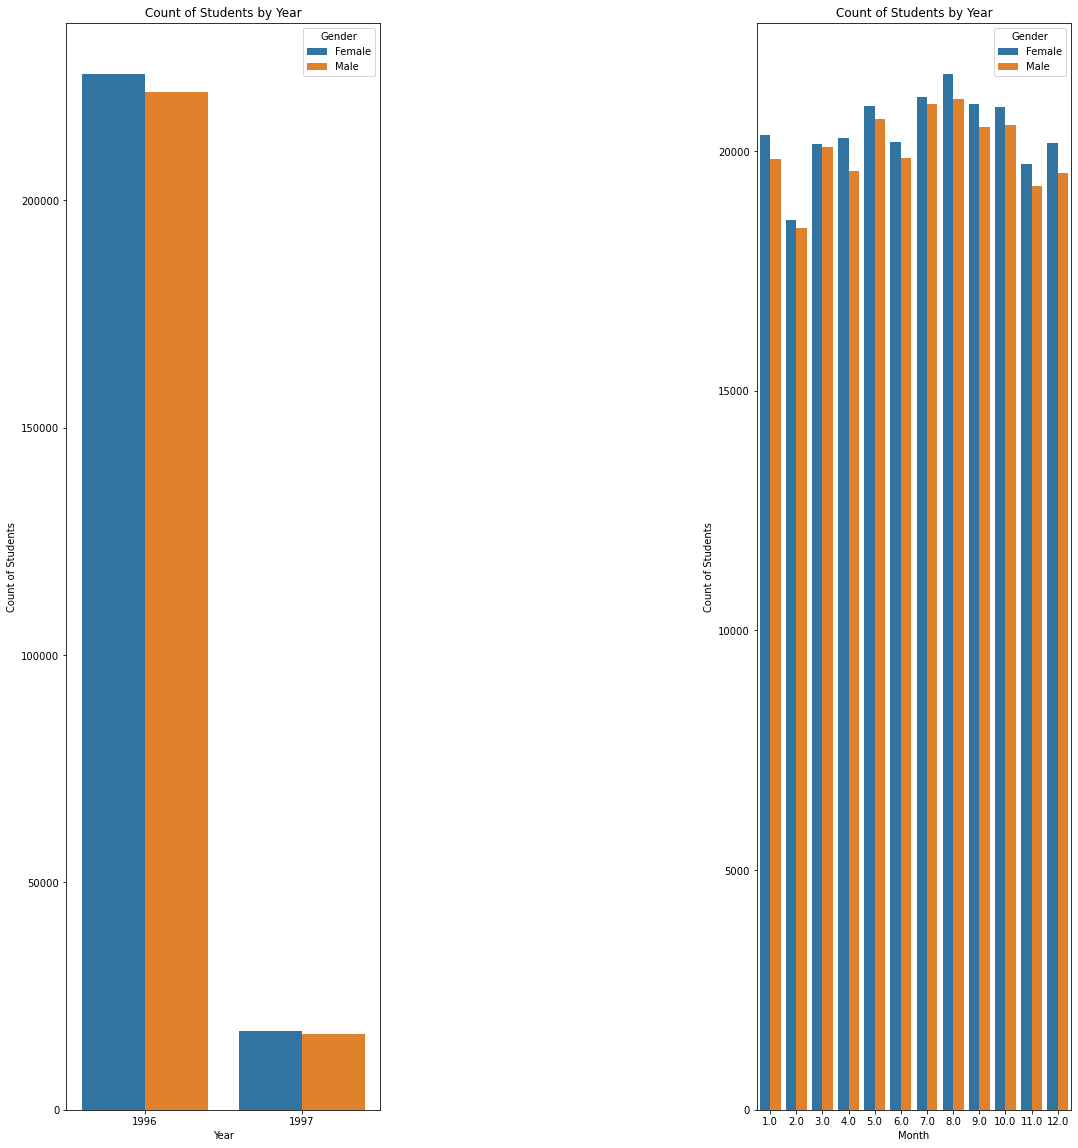

In [62]:
# Plot 6: Relationship between the genders with the year of birth:
plt.figure(figsize = [18, 20])
#sns.set_context("notebook")
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 2, 1)
sb.countplot(data = df_pisa4, x = 'Birth_Year', hue = 'Gender');

# Set the plot's title, labels and legend title
plt.title("Count of Students by Year")
plt.ylabel('Count of Students')
plt.xlabel('Year')
plt.legend(title = "Gender");

plt.subplot(1, 2, 2)
sb.countplot(data = df_pisa4, x = 'Birth_Month', hue = 'Gender');

# Set the plot's title, labels and legend title
plt.title("Count of Students by Year")
plt.ylabel('Count of Students')
plt.xlabel('Month')
plt.legend(title = "Gender");


There is a slight difference in the male and female student born in the different months and years with male being consistently less in all months even after the breakdown with August being the month with the highest number of students born.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The strongest positive correlations can be observed between the scores of the different test areas math, reading, or science.If a student does well in one subject, it is likely that they will do well in another as well. It also shows the factors affecting the students scores(Sense of Belonging, Attributions of Failure in Maths Score, Motivation for Maths and Perseverance scores) are only weakly correlated with test scores. There are even negatively correlated factors with students' performance in the PISA test, though the correlation is rather weak. 

> Most countries performed slightly in the same region in all tests between 400 - 500 points with China being the best performing country in all tests while Peru was the least.

> The total score in 1996 is slightly higher than that of 1997 but note that majority of the students were born in 1996 which might be a cause of the difference.

> There is no difference in the total scores of male and female, there is only a slight difference numbers where the female is slightly more than the male one.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a slight difference in the male and female student born in the different months and years with male being consistently less in all months even after the breakdown with August being the month with the highest number of students born.

## Multivariate Exploration.

**Question**: The relation between the Total Scores Against the Instrumental motivations of different Modes. 

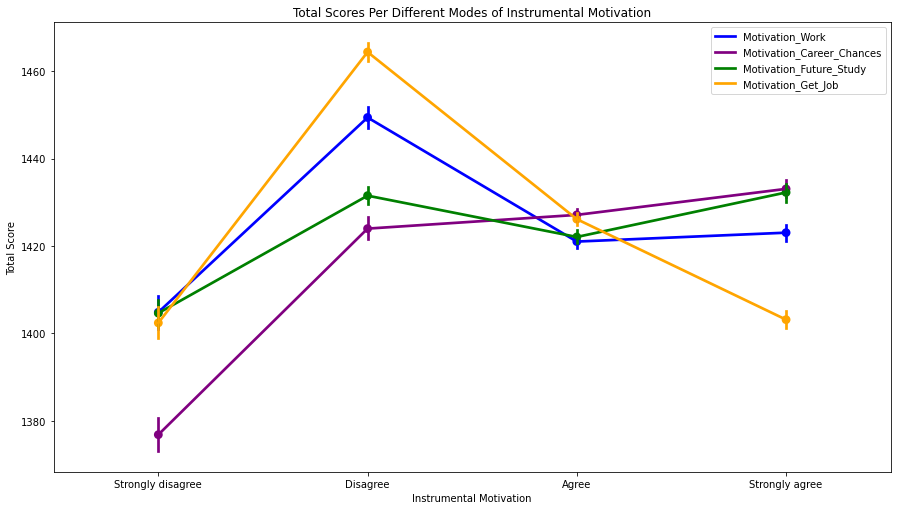

In [63]:
#Point plot to show the relationship between different ratings of the Instrumental Motivation modes against the total scores
plt.figure(figsize=[15, 8.27])
# for color loop
variable_colors = [("Motivation_Work", "blue"), ("Motivation_Career_Chances", "purple"), ("Motivation_Future_Study", "green"), 
                   ("Motivation_Get_Job", "orange")]
for v in variable_colors: 
    ax = sb.pointplot(data = df_pisa4, x = v[0], y = "Total Score", color = v[1], linestyles = "-")
    
plt.legend(labels=["Motivation_Work", "Motivation_Career_Chances", "Motivation_Future_Study", 
                   "Motivation_Get_Job"])
ax = plt.gca()
for v in variable_colors:
    ax.get_legend().legendHandles[variable_colors.index(v)].set_color(v[1])

ax.set(xlabel = "Instrumental Motivation", ylabel= "Total Score", title="Total Scores Per Different Modes of Instrumental Motivation")
plt.show();



From the above plot, we can see that from all modes, those who strongly disagreed on all 4 modes of motivation got the lowest scores which might the reason of low scores.

Those who Disagreed that their motivation was for a chance to get a job had the highest total points which shows that getting a job might not be the best motivation for students to pass their tests.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Those who strongly disagreed on all 4 modes of motivation got the lowest scores which might the reason of low scores.

### Were there any interesting or surprising interactions between features?

> Those who Disagreed that their motivation was for a chance to get a job had the highest total points which shows that getting a job might not be the best motivation for students to pass their tests.

## Conclusions

>A lot of the students are born in 1996 with 93% and 7% born in 1997. 

>The vast majority of students are between 15 and 16 years old with the most popular age is around 15.5.

> Most countries performed slightly in the same region in all tests between 400 - 500 points with China being the best performing country in all tests while Peru was the least.

>The strongest positive correlations can be observed between the scores of the different test areas math, reading, or science.If a student does well in one subject, it is likely that they will do well in another as well.

> Those who strongly disagreed on all 4 modes of motivation got the lowest scores which might the reason of low scores.


In [64]:
# Store new dataframe in new CSV file
df_pisa4.to_csv("pisa_new.csv", index=False, encoding="utf-8")
